<a href="https://colab.research.google.com/github/MohsenEssam1/cancer_detect-/blob/main/cancer_detect_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Breast cancer Detection<center><h1>

# My libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore                  # for changing color of important text I want to focus on 

from PIL import Image                      # Using it for my images 
from IPython.display import display

# My Figure size

In [ ]:
from matplotlib import rcParams            # to manipulate sizes of my figers
rcParams['figure.figsize'] = (8,6)  

### All the data I will use are in a folder named 'Datasets' 

In [ ]:
# To make my data expressive I will add column names (this names will be from "Datasets/breast-cancer-wisconsin.names")

my_col_names = ['Sample code number:(id number)','Clump Thickness:(1-10)','Uniformity of Cell Size:(1-10)',
                'Uniformity of Cell Shape:(1-10)','Marginal Adhesion:(1-10)','Single Epithelial Cell Size:(1-10)',
                'Bare Nuclei:(1-10)','Bland Chromatin:(1-10)','Normal Nucleoli:(1-10)','Mitoses:(1-10)',
                'Class:(2 for benign, 4 for malignant)'
               ]

breast_cancer_wisconsin = pd.read_csv("Datasets/breast-cancer-wisconsin.data",
                                      names=my_col_names)


breast_cancer_wisconsin

,Sample code number:(id number),Clump Thickness:(1-10),Uniformity of Cell Size:(1-10),Uniformity of Cell Shape:(1-10),Marginal Adhesion:(1-10),Single Epithelial Cell Size:(1-10),Bare Nuclei:(1-10),Bland Chromatin:(1-10),Normal Nucleoli:(1-10),Mitoses:(1-10),"Class:(2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# Now my data is ready to be explored :)

In [ ]:
breast_cancer_wisconsin.head()

,Sample code number:(id number),Clump Thickness:(1-10),Uniformity of Cell Size:(1-10),Uniformity of Cell Shape:(1-10),Marginal Adhesion:(1-10),Single Epithelial Cell Size:(1-10),Bare Nuclei:(1-10),Bland Chromatin:(1-10),Normal Nucleoli:(1-10),Mitoses:(1-10),"Class:(2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
breast_cancer_wisconsin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Sample code number:(id number)         699 non-null    int64 
 1   Clump Thickness:(1-10)                 699 non-null    int64 
 2   Uniformity of Cell Size:(1-10)         699 non-null    int64 
 3   Uniformity of Cell Shape:(1-10)        699 non-null    int64 
 4   Marginal Adhesion:(1-10)               699 non-null    int64 
 5   Single Epithelial Cell Size:(1-10)     699 non-null    int64 
 6   Bare Nuclei:(1-10)                     699 non-null    object
 7   Bland Chromatin:(1-10)                 699 non-null    int64 
 8   Normal Nucleoli:(1-10)                 699 non-null    int64 
 9   Mitoses:(1-10)                         699 non-null    int64 
 10  Class:(2 for benign, 4 for malignant)  699 non-null    int64 
dtypes: int64(10), objec

In [ ]:
breast_cancer_wisconsin.shape[1]
print(Fore.LIGHTBLUE_EX + "Number of rows is : {} \nNumber of columns is : {}"
      .format(breast_cancer_wisconsin.shape[0],breast_cancer_wisconsin.shape[1]))

Number of rows is : 699 
Number of columns is : 11


### Checking for complete duplicates 

In [ ]:
print(Fore.RED + 'Number of complete duplicates was : ', breast_cancer_wisconsin.duplicated().sum())
breast_cancer_wisconsin.drop_duplicates(inplace=True)
print(Fore.GREEN + 'Number of complete duplicates now is : ', breast_cancer_wisconsin.duplicated().sum())

Number of complete duplicates was :  8
Number of complete duplicates now is :  0


### Some other thing I want to check is that wether is there id duplicates and the reason for that... Is that there must be no 2 persons with the same id it must be an error in the data that must be removed !!

In [ ]:
print(Fore.RED + 'Number of id duplicates was : ', 
      breast_cancer_wisconsin['Sample code number:(id number)'].duplicated().sum())
id_duplicate = breast_cancer_wisconsin[breast_cancer_wisconsin['Sample code number:(id number)'].duplicated()].index
breast_cancer_wisconsin.drop(id_duplicate,axis=0,inplace=True)
print(Fore.GREEN + 'Number of id duplicates now is : ', 
      breast_cancer_wisconsin['Sample code number:(id number)'].duplicated().sum())

Number of id duplicates was :  46
Number of id duplicates now is :  0


In [ ]:
breast_cancer_wisconsin.describe()

,Sample code number:(id number),Clump Thickness:(1-10),Uniformity of Cell Size:(1-10),Uniformity of Cell Shape:(1-10),Marginal Adhesion:(1-10),Single Epithelial Cell Size:(1-10),Bland Chromatin:(1-10),Normal Nucleoli:(1-10),Mitoses:(1-10),"Class:(2 for benign, 4 for malignant)"
count,6.450000e+02,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1.074419e+06,4.471318,3.182946,3.269767,2.893023,3.275969,3.497674,2.955039,1.613953,2.719380
std,6.372627e+05,2.858115,3.059049,2.985748,2.918036,2.247455,2.459374,3.120682,1.744056,0.960564
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.715490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238186e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Ok while exploring data I noticed too many things that must be changed !!! 
> - id number (first column) should be `object` not `int` <br><br>
> - Class:(2 for benign, 4 for malignant) should also be `object` not `int` <br><br>
> - Bare Nuclei:(1-10) should be `int` not an `object` <br><br>
> - There was `8` complete duplicates that I removed<br><br>
> - There was `54` id duplicates that I removed

# Now for Data cleaning :)

In [ ]:
# since that all columns contains int execpt for "Bare Nuclei:(1-10)" then I will see if there is nan values or no
# if there is nonan values in this columns .... then this columns are clean and needs no further work

breast_cancer_wisconsin.isna().sum()

Sample code number:(id number)           0
Clump Thickness:(1-10)                   0
Uniformity of Cell Size:(1-10)           0
Uniformity of Cell Shape:(1-10)          0
Marginal Adhesion:(1-10)                 0
Single Epithelial Cell Size:(1-10)       0
Bare Nuclei:(1-10)                       0
Bland Chromatin:(1-10)                   0
Normal Nucleoli:(1-10)                   0
Mitoses:(1-10)                           0
Class:(2 for benign, 4 for malignant)    0
dtype: int64

In [ ]:
breast_cancer_wisconsin['Sample code number:(id number)'] = breast_cancer_wisconsin['Sample code number:(id number)'].astype('object')
print(Fore.LIGHTBLUE_EX + 'Type of id column now is : ', Fore.GREEN,
    breast_cancer_wisconsin['Sample code number:(id number)'].dtypes)

breast_cancer_wisconsin['Class:(2 for benign, 4 for malignant)'] = breast_cancer_wisconsin['Class:(2 for benign, 4 for malignant)'].astype('object')
print(Fore.LIGHTBLUE_EX + 'Type of Class column now is : ', Fore.GREEN,
    breast_cancer_wisconsin['Class:(2 for benign, 4 for malignant)'].dtypes)

Type of id column now is :   object
Type of Class column now is :   object


### Ok, While doing the same to change Bare Nuclei column to int I got an error :( ...<br><br>And the reason that there is some non-digit values in the column so it neads more cleaning  (I will show the data I got now)

In [ ]:
breast_cancer_wisconsin['Bare Nuclei:(1-10)'].value_counts()

## The problem is in " ? " 

1     362
10    126
3      28
5      28
2      27
4      19
8      19
?      16
9       8
7       8
6       4
Name: Bare Nuclei:(1-10), dtype: int64

### The `problem is in " ? "` so I nead to replace it or dropping its `16` row  (Which is not good) So I will replace the columns

### Ok now to replace such data I will need to know what is bare nuclei and what does it do and it's definition in Biology 
### "A nucleus in a cytologic preparation that is virtually devoid of cytoplasm, which is typically seen in cell degeneration." (and that what I found)
### As a summery it is kind of cells without cytoplasm which is not good, I will show an image of such cell

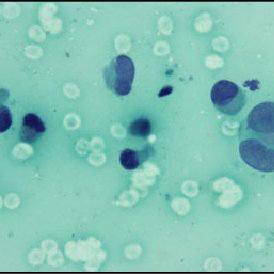

In [ ]:
bare_nuclei_image = Image.open('Images/bare_nuclei_image.jpg')
with bare_nuclei_image as my_image:
    display(my_image)

##### Large bare nuclei can be seen between the cells with the large cytoplasm, Papanicolaou stain, 100x <br><br> Image source : https://www.researchgate.net/figure/Large-bare-nuclei-can-be-seen-between-the-cells-with-the-large-cytoplasm-Papanicolaou_fig2_264555795

## So everything is quite obvious Now So I want to begin replacing now

In [ ]:
breast_cancer_wisconsin['Class:(2 for benign, 4 for malignant)'].describe()

# Everything is alright 

count     645
unique      2
top         2
freq      413
Name: Class:(2 for benign, 4 for malignant), dtype: int64

### I will replace ` ? ` by ` nan `

In [ ]:
breast_cancer_wisconsin['Bare Nuclei:(1-10)'].replace('?',np.nan,inplace=True)
breast_cancer_wisconsin['Bare Nuclei:(1-10)'] = breast_cancer_wisconsin['Bare Nuclei:(1-10)'].astype('float')
print(Fore.GREEN + 'Now "?" is replaced by nan values :) and type is float')

Now "?" is replaced by nan values :) and type is float


In [ ]:
## first I want to notice the relation between Class:(2 for benign, 4 for malignant) and Bare Nuclei:(1-10)
## So I will 2 dataframes for that 

begnign_relation_to_bare_nuclei = breast_cancer_wisconsin[['Bare Nuclei:(1-10)','Class:(2 for benign, 4 for malignant)']][breast_cancer_wisconsin['Class:(2 for benign, 4 for malignant)'] == 2]
begnign_relation_to_bare_nuclei

,Bare Nuclei:(1-10),"Class:(2 for benign, 4 for malignant)"
0,1.0,2
1,10.0,2
2,2.0,2
3,4.0,2
4,1.0,2
...,...,...
689,1.0,2
692,1.0,2
693,1.0,2
694,2.0,2


In [ ]:
malignant_relation_to_bare_nuclei = breast_cancer_wisconsin[['Bare Nuclei:(1-10)','Class:(2 for benign, 4 for malignant)']][breast_cancer_wisconsin['Class:(2 for benign, 4 for malignant)'] == 4]
malignant_relation_to_bare_nuclei

,Bare Nuclei:(1-10),"Class:(2 for benign, 4 for malignant)"
5,10.0,4
12,3.0,4
14,9.0,4
15,1.0,4
18,10.0,4
...,...,...
670,8.0,4
680,10.0,4
681,10.0,4
696,3.0,4


### Now what Iam going to do is that I will show using countplot the relations between Class:(2 for benign, 4 for malignant) and Bare Nuclei

We can notice that the most number is 1 which is small


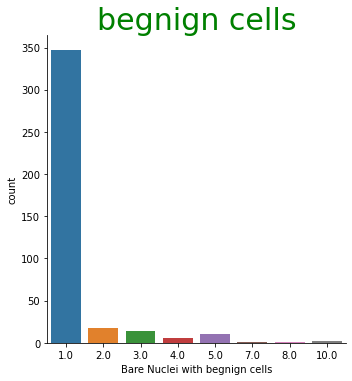

We can notice that the most number is 10 which is large then other numbers more than 5


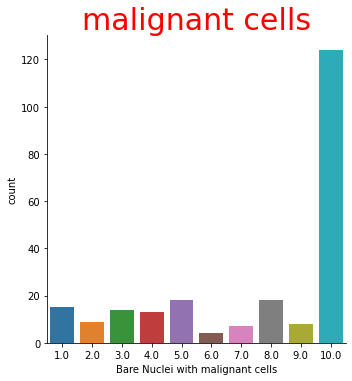

In [ ]:
sns.catplot(x='Bare Nuclei:(1-10)',data=begnign_relation_to_bare_nuclei,kind='count')
plt.xlabel('Bare Nuclei with begnign cells')
plt.title('begnign cells',color='g',size=30)
print(Fore.GREEN + 'We can notice that the most number is 1 which is small')
plt.show()


sns.catplot(x='Bare Nuclei:(1-10)',data=malignant_relation_to_bare_nuclei,kind='count')
plt.xlabel('Bare Nuclei with malignant cells')
plt.title('malignant cells',color='r',size=30)
print(Fore.RED + 'We can notice that the most number is 10 which is large then other numbers more than 5')
plt.show()

### As a result now I know that when its bagnign it will be most likely to be 1 or other number less than 5 <br><br>And when its malignant it will be most likely to be 10 or other number more than 5<br><br> So as a good approach we can replace values which is malignant (4) by 10 and values which is begnign (2) by 1 but first I want to see the relations between values that is because there may be other variables that will affects the data significantly so I will plot a heatmap

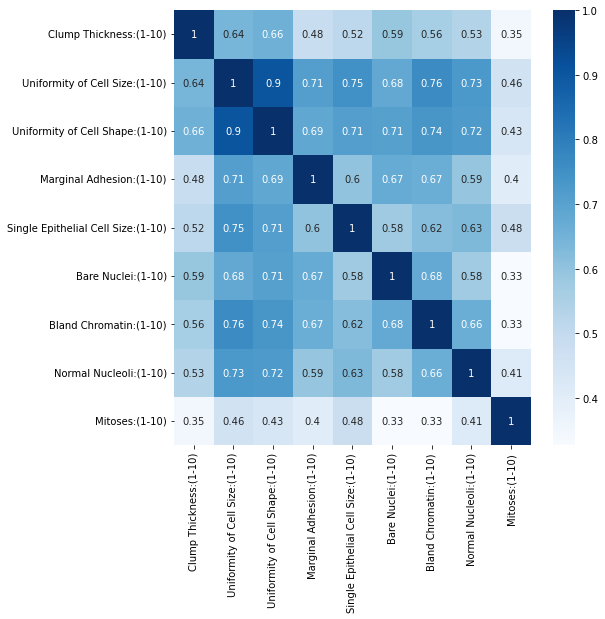

In [ ]:
my_cols = ['Clump Thickness:(1-10)', 'Uniformity of Cell Size:(1-10)', 'Uniformity of Cell Shape:(1-10)',
           'Marginal Adhesion:(1-10)', 'Single Epithelial Cell Size:(1-10)','Bare Nuclei:(1-10)','Bland Chromatin:(1-10)',
          'Normal Nucleoli:(1-10)','Mitoses:(1-10)'
          ]
rcParams['figure.figsize'] = (8,8)                  # setting size
sns.heatmap(breast_cancer_wisconsin[my_cols].corr(),cmap='Blues',annot=True)
plt.show()

### Ok, After checking the heatmap I can notice that Some values have strong relations like "Uniformity of Cell Shape" and "Uniformity of Cell Size" 
### I will also try to visualize only the relation between Bare Nuclei and other columns that I think is important when replacing nans

In [ ]:
correlation_list = []
my_cols = []
for i in breast_cancer_wisconsin.columns:
    if i == 'Sample code number:(id number)' or i == 'Class:(2 for benign, 4 for malignant)' or i == 'Bare Nuclei:(1-10)':
        pass
    else:
        my_cols.append(i)
        correlation_list.append(breast_cancer_wisconsin['Bare Nuclei:(1-10)'].corr(breast_cancer_wisconsin[i]))
        print(Fore.LIGHTBLUE_EX,i,'-------->', breast_cancer_wisconsin['Bare Nuclei:(1-10)'].corr(breast_cancer_wisconsin[i]))

 Clump Thickness:(1-10) --------> 0.5916060506910789
 Uniformity of Cell Size:(1-10) --------> 0.6816209632555983
 Uniformity of Cell Shape:(1-10) --------> 0.7057579967766202
 Marginal Adhesion:(1-10) --------> 0.6722499669743914
 Single Epithelial Cell Size:(1-10) --------> 0.5771938175032059
 Bland Chromatin:(1-10) --------> 0.6785915908742939
 Normal Nucleoli:(1-10) --------> 0.5761851437761053
 Mitoses:(1-10) --------> 0.3266037369397821


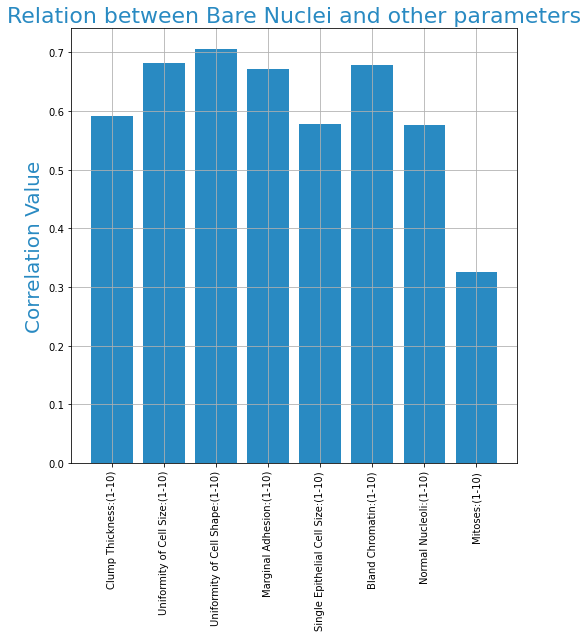

In [ ]:
plt.bar(my_cols,correlation_list,color='#298ac2')
plt.xticks(rotation=90)
plt.ylabel('Correlation Value',color='#298ac2',size='20')
plt.title('Relation between Bare Nuclei and other parameters',color='#298ac2',size='22')

plt.grid()
plt.show()

### We can see that Uniformity of Cell Shape affects Bare nuclei so as a reason I will take it into consideration while replacing nan values

In [ ]:
breast_cancer_wisconsin

,Sample code number:(id number),Clump Thickness:(1-10),Uniformity of Cell Size:(1-10),Uniformity of Cell Shape:(1-10),Marginal Adhesion:(1-10),Single Epithelial Cell Size:(1-10),Bare Nuclei:(1-10),Bland Chromatin:(1-10),Normal Nucleoli:(1-10),Mitoses:(1-10),"Class:(2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3,1,1,1,2,1.0,2,1,2,2
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4


# Ok the last thing I want to do to clean "Bare Nuclei" column is to replace nan values 

### I will make a new dataframe using what I know based on my previous analysis where my steps will be
> - if value of `Class is malignant (4)` and Uniformity of `Cell Shape > 5` then I will replace Bare Nuclei value by `10`
> - if value of `Class is malignant (4)` and Uniformity of `Cell Shape < 5` then I will replace Bare Nuclei value by `7`
> - if value of `Class is benign (2)` and Uniformity of `Cell Shape > 5` then I will replace Bare Nuclei value by `3`
> - if value of `Class is benign (2)` and Uniformity of `Cell Shape < 5` then I will replace Bare Nuclei value by `1`

In [ ]:
to_replace_nan = breast_cancer_wisconsin[['Uniformity of Cell Shape:(1-10)','Class:(2 for benign, 4 for malignant)']]
to_replace_nan['to_replace'] = 'empty till now'

C:\Users\ahmed_nlhvcl\AppData\Local\Temp\ipykernel_19168\2525008612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_replace_nan['to_replace'] = 'empty till now'


In [ ]:
to_replace_nan

,Uniformity of Cell Shape:(1-10),"Class:(2 for benign, 4 for malignant)",to_replace
0,1,2,empty till now
1,4,2,empty till now
2,1,2,empty till now
3,8,2,empty till now
4,1,2,empty till now
...,...,...,...
693,1,2,empty till now
694,1,2,empty till now
695,1,2,empty till now
696,10,4,empty till now


In [ ]:
for i in to_replace_nan.index:
    value1 = to_replace_nan['Uniformity of Cell Shape:(1-10)'].loc[i]
    value2 = to_replace_nan['Class:(2 for benign, 4 for malignant)'].loc[i]
    if value2 == 4 and value1 >= 5:
        to_replace_nan['to_replace'].loc[i] = 10
    elif value2 == 4 and value1 < 5:
        to_replace_nan['to_replace'].loc[i] = 7
    elif value2 == 2 and value1 >= 5:
        to_replace_nan['to_replace'].loc[i] = 3
    elif value2 == 2 and value1 < 5:
        to_replace_nan['to_replace'].loc[i] = 1
        
to_replace_nan

C:\Users\ahmed_nlhvcl\AppData\Local\Temp\ipykernel_19168\1235962138.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_replace_nan['to_replace'].loc[i] = 1
C:\Users\ahmed_nlhvcl\AppData\Local\Temp\ipykernel_19168\1235962138.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_replace_nan['to_replace'].loc[i] = 3
C:\Users\ahmed_nlhvcl\AppData\Local\Temp\ipykernel_19168\1235962138.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Uniformity of Cell Shape:(1-10),"Class:(2 for benign, 4 for malignant)",to_replace
0,1,2,1
1,4,2,1
2,1,2,1
3,8,2,3
4,1,2,1
...,...,...,...
693,1,2,1
694,1,2,1
695,1,2,1
696,10,4,10


In [ ]:
print(Fore.RED,'Number of nan values was :',breast_cancer_wisconsin['Bare Nuclei:(1-10)'].isna().sum())
breast_cancer_wisconsin['Bare Nuclei:(1-10)'] = breast_cancer_wisconsin['Bare Nuclei:(1-10)'].fillna(to_replace_nan['to_replace'])
breast_cancer_wisconsin['Bare Nuclei:(1-10)'] = breast_cancer_wisconsin['Bare Nuclei:(1-10)'].astype('int')
print(Fore.GREEN,'Number of nan values now is :',breast_cancer_wisconsin['Bare Nuclei:(1-10)'].isna().sum())

 Number of nan values was : 16
 Number of nan values now is : 0


## Check if there still complete duplicates :

In [ ]:
print(Fore.GREEN,'Number of complete duplicates now is : ',breast_cancer_wisconsin.duplicated().sum())

# Now everything is fine so I will remove id column 

 Number of complete duplicates now is :  0


## Now I will remove id column because it will be no more usefull

In [ ]:
breast_cancer_wisconsin.drop('Sample code number:(id number)',inplace=True,axis=1)

# I used this column previously to know duplicates
# But know it is useless

# Finally I can say that the data now is clean and ready to use :) 

### Now look at the data:

In [ ]:
breast_cancer_wisconsin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Clump Thickness:(1-10)                 645 non-null    int64 
 1   Uniformity of Cell Size:(1-10)         645 non-null    int64 
 2   Uniformity of Cell Shape:(1-10)        645 non-null    int64 
 3   Marginal Adhesion:(1-10)               645 non-null    int64 
 4   Single Epithelial Cell Size:(1-10)     645 non-null    int64 
 5   Bare Nuclei:(1-10)                     645 non-null    int32 
 6   Bland Chromatin:(1-10)                 645 non-null    int64 
 7   Normal Nucleoli:(1-10)                 645 non-null    int64 
 8   Mitoses:(1-10)                         645 non-null    int64 
 9   Class:(2 for benign, 4 for malignant)  645 non-null    object
dtypes: int32(1), int64(8), object(1)
memory usage: 69.1+ KB


In [ ]:
breast_cancer_wisconsin.isna().sum()

Clump Thickness:(1-10)                   0
Uniformity of Cell Size:(1-10)           0
Uniformity of Cell Shape:(1-10)          0
Marginal Adhesion:(1-10)                 0
Single Epithelial Cell Size:(1-10)       0
Bare Nuclei:(1-10)                       0
Bland Chromatin:(1-10)                   0
Normal Nucleoli:(1-10)                   0
Mitoses:(1-10)                           0
Class:(2 for benign, 4 for malignant)    0
dtype: int64

In [ ]:
breast_cancer_wisconsin

,Clump Thickness:(1-10),Uniformity of Cell Size:(1-10),Uniformity of Cell Shape:(1-10),Marginal Adhesion:(1-10),Single Epithelial Cell Size:(1-10),Bare Nuclei:(1-10),Bland Chromatin:(1-10),Normal Nucleoli:(1-10),Mitoses:(1-10),"Class:(2 for benign, 4 for malignant)"
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1,2,1,2,2
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4


# Ok there is still one last thing that I want to do which is
### I want to change "Class:(2 for benign, 4 for malignant)" column values and names <br> So it's name will be "is malignant" and if True it will take value of 1 and 0 if it is begnign

In [ ]:
breast_cancer_wisconsin.rename(columns={'Class:(2 for benign, 4 for malignant)':'Is malignant'},inplace=True)
print(Fore.GREEN,'Now the column name is "Is malignant"')

 Now the column name is "Is malignant"


In [ ]:
breast_cancer_wisconsin['Is malignant'].replace([2,4],[0,1],inplace=True)
breast_cancer_wisconsin.index = np.arange(0, len(breast_cancer_wisconsin))  # making my index starts from 0
breast_cancer_wisconsin

# I did so for making the data more insightful and be easier to understand while making the ML model

,Clump Thickness:(1-10),Uniformity of Cell Size:(1-10),Uniformity of Cell Shape:(1-10),Marginal Adhesion:(1-10),Single Epithelial Cell Size:(1-10),Bare Nuclei:(1-10),Bland Chromatin:(1-10),Normal Nucleoli:(1-10),Mitoses:(1-10),Is malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
640,3,1,1,1,2,1,2,1,2,0
641,3,1,1,1,3,2,1,1,1,0
642,2,1,1,1,2,1,1,1,1,0
643,5,10,10,3,7,3,8,10,2,1


## So this is the end of data cleaning stage

# Now I will start building the machine learning model <br><br><br><br><br><br>

<h1><center>KNN Classification Algorithm<center><h1>

# My Libraries

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# My Data

In [ ]:
breast_cancer_wisconsin.head()

,Clump Thickness:(1-10),Uniformity of Cell Size:(1-10),Uniformity of Cell Shape:(1-10),Marginal Adhesion:(1-10),Single Epithelial Cell Size:(1-10),Bare Nuclei:(1-10),Bland Chromatin:(1-10),Normal Nucleoli:(1-10),Mitoses:(1-10),Is malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


## Now I will start building my machine learning model So what I will do is :
> - I will make columns from "Clump Thickness:(1-10)" to "Mitoses:(1-10)" as X values `(Input values)`<br><br>
> - I will make "Is malignant" column as Y `(Target-value)`

In [ ]:
X_cols = []
for i in breast_cancer_wisconsin.columns:
    if i == 'Is malignant':
        break
    X_cols.append(i)
    
X = breast_cancer_wisconsin[X_cols].values
Y = breast_cancer_wisconsin['Is malignant'].values

In [ ]:
print(Fore.LIGHTBLUE_EX,'Shape of Input values is :',X.shape)
print(Fore.LIGHTMAGENTA_EX,'Shape of Target value is :',Y.shape)

 Shape of Input values is : (645, 9)
 Shape of Target value is : (645,)


# Now I got my values, it is time to train data and measure accuracy

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10, stratify=Y)
train_accuracies = {}
test_accuracies = {}
K_number = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,Y)
    train_accuracies[i] = knn.score(X_train,Y_train)
    test_accuracies[i] = knn.score(X_test,Y_test)
    K_number.append(i)

In [ ]:
print(Fore.LIGHTBLUE_EX,'My train accuracies Values is :\n\n',train_accuracies)
print('\n\n')
print(Fore.LIGHTMAGENTA_EX,'My test accuracies Values is :\n\n',test_accuracies)

 My train accuracies Values is :

 {1: 1.0, 2: 0.9822616407982262, 3: 0.991130820399113, 4: 0.9733924611973392, 5: 0.9844789356984479, 6: 0.9844789356984479, 7: 0.9844789356984479, 8: 0.9800443458980045, 9: 0.9822616407982262, 10: 0.975609756097561, 11: 0.9800443458980045, 12: 0.9733924611973392, 13: 0.9733924611973392, 14: 0.9733924611973392, 15: 0.975609756097561, 16: 0.9733924611973392, 17: 0.9733924611973392, 18: 0.9733924611973392, 19: 0.975609756097561, 20: 0.9733924611973392, 21: 0.975609756097561, 22: 0.9733924611973392, 23: 0.9733924611973392, 24: 0.9711751662971175, 25: 0.9733924611973392, 26: 0.9689578713968958, 27: 0.9689578713968958, 28: 0.9689578713968958, 29: 0.9689578713968958, 30: 0.9689578713968958}



 My test accuracies Values is :

 {1: 1.0, 2: 0.9587628865979382, 3: 0.9690721649484536, 4: 0.9690721649484536, 5: 0.9742268041237113, 6: 0.9690721649484536, 7: 0.9690721649484536, 8: 0.9690721649484536, 9: 0.9639175257731959, 10: 0.9639175257731959, 11: 0.9587628865979

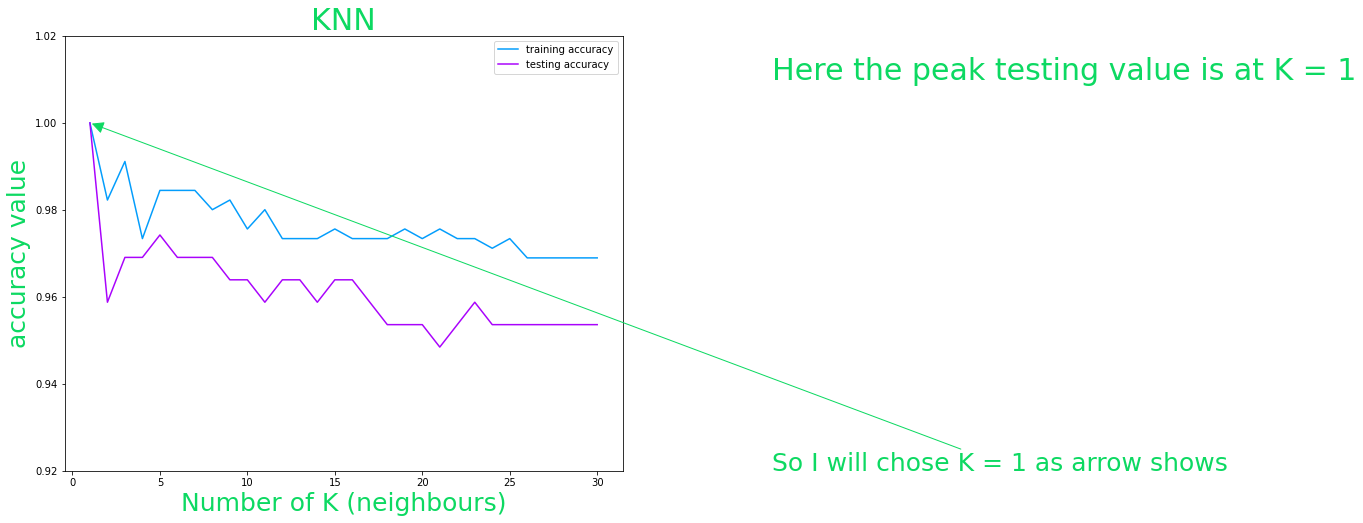

In [ ]:
plt.figure(figsize=(10,8))
plt.title('KNN',size=30,color='#0dd962')
plt.plot(K_number,train_accuracies.values(),color='#039dfc')
plt.plot(K_number,test_accuracies.values(),color='#a903fc')
plt.legend(['training accuracy','testing accuracy'])
plt.xlabel('Number of K (neighbours)',size=25,color='#0dd962')
plt.ylabel('accuracy value',size=25,color='#0dd962')
plt.ylim([0.92, 1.02])

plt.annotate("Here the peak testing value is at K = 1",    
             size=30,
             color='#0dd962',
             xy = (15,1.01),                                 
             xytext = (40,1.01),                               
             arrowprops = None
)
plt.annotate("So I will chose K = 1 as arrow shows",
             size=25,
             color='#0dd962',
             xy = (1,1),                                 
             xytext = (40,0.92),                               
             arrowprops = {'arrowstyle':'-|>', 'color':'#0dd962'}
)

plt.show()

## Now I know that the best model will be by using K=1,where it's efficiency is near to 100% ... So I will build my model using K=1

In [ ]:
my_knn = KNeighborsClassifier(n_neighbors=1)
my_knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=1)

## To use the model you will need to input a numpy array with 9 columns and you will get the result 

## I will make a small test code where I will input last 200 values in my dataframe and I will see how my model will predict the results, and will the predict it as expected or no (expected to get efficiency near to 100%)

In [ ]:
x_in = X[445::]
y_out = knn.predict(x_in)

In [ ]:
print(Fore.BLUE,'My model predictions : \n\n',y_out)
my_values_in_dataframe = breast_cancer_wisconsin['Is malignant'][445::].values
print('\n')
print(Fore.LIGHTBLUE_EX,'The True data that we should get : \n\n',y_out)

 My model predictions : 

 [0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1]


 The True data that we should get : 

 [0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [ ]:
is_prediction_correct = (y_out == my_values_in_dataframe)
correct = []
wrong = []
for i in is_prediction_correct:
    if i == True:
        correct.append(i)
    else:
        wrong.append(i)

In [ ]:
print(Fore.GREEN,'Number of correct predictions is : ', len(correct))
print(Fore.RED,'Number of wrong predictions is : ', len(wrong))

 Number of correct predictions is :  199
 Number of wrong predictions is :  1


## The results are literally spectacular :) .... As the model predicted we are nearly 100% correct.<br>
#### *Error is 1/200 which equals 0.005  (Which is neglected)*

## So this Is the end of my model !!!

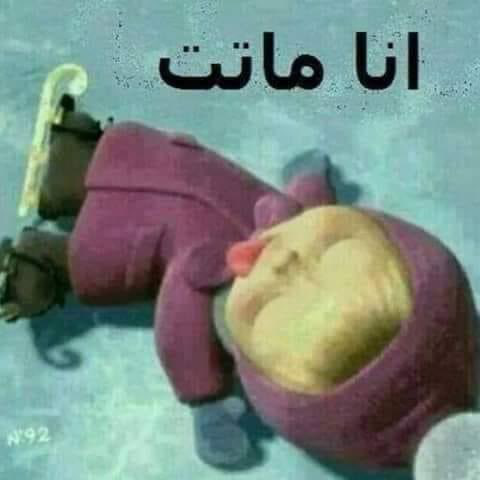

In [ ]:
useless_image = Image.open('Images/useless1.jpg')
with useless_image as my_image:
    display(my_image)

<br><br><br><br><br><br>
<h1><center>THE END<center><h1>